In [1]:
import pandas as pd

Sentiment Percentages:
Sentiment
positive    91.578947
negative     3.684211
             3.578947
neutral      1.157895
Name: count, dtype: float64
positive rows: 91.58%
negative rows: 3.68%
 rows: 3.58%
neutral rows: 1.16%


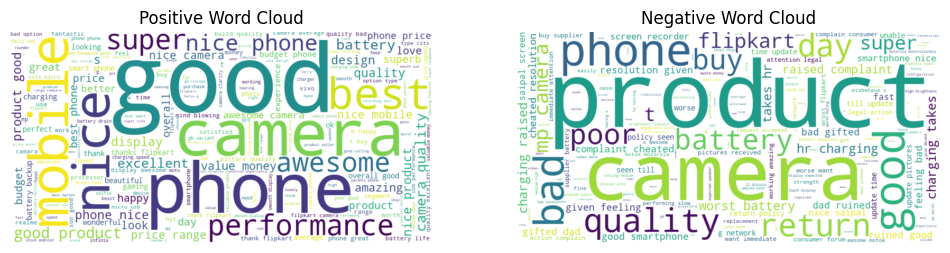

In [14]:
import pandas as pd
import spacy
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load the CSV file
df = pd.read_csv('/Users/harshpatel/Desktop/Final_Project/website/data/Final_Final.csv')

# Load spaCy's English tokenizer
nlp = spacy.load('en_core_web_sm')

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Initialize lists to store sentiment and word frequencies
sentiments = []
positive_words = []
negative_words = []

# Create a new column for sentiment
df['Sentiment'] = ""

# Analyze sentiment and collect words
for index, row in df.iterrows():
    review = row['REVIEW BODY']
    if isinstance(review, str):
        doc = nlp(review)
        analysis = analyzer.polarity_scores(review)
        sentiment = 'positive' if analysis['compound'] >= 0.05 else 'negative' if analysis['compound'] <= -0.05 else 'neutral'
        df.at[index, 'Sentiment'] = sentiment

        # Collect words for positive and negative sentiments
        if sentiment == 'positive':
            positive_words.extend([token.text for token in doc if not token.is_punct and not token.is_stop])
        elif sentiment == 'negative':
            negative_words.extend([token.text for token in doc if not token.is_punct and not token.is_stop])

# Calculate sentiment percentages
sentiment_counts = df['Sentiment'].value_counts()
total_reviews = len(df)
sentiment_percentages = sentiment_counts / total_reviews * 100

# Print sentiment percentages
print("Sentiment Percentages:")
print(sentiment_percentages)

# Print which rows are positive, negative, or neutral and their percentages
for sentiment, percentage in sentiment_percentages.items():
    print(f"{sentiment} rows: {percentage:.2f}%")

# Create word clouds for positive and negative sentiments
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_words))
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negative_words))

# Plot the word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Word Cloud')
plt.axis('off')

plt.show()


In [28]:
df[df['Sentiment']=='negative']['REVIEW BODY']

47     good product owsm good product performing very...
49     good product owsm good product performing very...
61     ll discuss the pros decent battery can easily ...
69     nice product worst with battery charging it ta...
79     good product owsm good product performing very...
82     very good phone battery drains very fast and u...
83     very good phone battery drains very fast and u...
88     ll discuss the pros decent battery can easily ...
89     ll discuss the pros decent battery can easily ...
253    product is ok for its worth but display is not...
320    nice product worst with battery charging it ta...
336    worse return policy i ever seen till now no up...
370    haanset very good configuration very good but ...
381    nice product worst with battery charging it ta...
392    haanset very good configuration very good but ...
398    nice product worst with battery charging it ta...
407    product is ok for its worth but display is not...
408    product is ok for its wo

In [7]:
df=pd.read_csv('/Users/harshpatel/Desktop/Final_Project/website/data/Final_Final.csv')

In [8]:
df.head()

,Unnamed: 0,Mobile Name,Images,Price,In The Box,Model Number,Color,Display Size,Operating System,Internal Storage,...,Battery Capacity,Rating,Star Wise Rating,Total_Ratings,Total_Reviews,Review Title,REVIEW BODY,DL Sentiment Pred,ML Sentiment Pred,Company Name
0,0,"POCO M6 Pro 5G (Power Black, 128 GB)",https://rukminim2.flixcart.com/image/312/312/x...,"₹12,999","Handset, 22.5W Charger, USB Type-C Cable, Sim ...",MZB0EPSIN,Power Black,17.25 cm (6.79 inch),Android 13,128 GB,...,5000 mAh,4.3,"['799', '272', '81', '29', '98']","1,279",100,"['Good quality product', 'Really Nice', 'Value...",best phone in this price range thank you flipk...,Positive,Positive,POCO
1,1,"POCO M6 Pro 5G (Forest Green, 64 GB)",https://rukminim2.flixcart.com/image/312/312/x...,"₹10,999","Handset, 22.5W Charger, USB Type-C Cable, Sim ...",MZB0EQJIN,Forest Green,17.25 cm (6.79 inch),Android 13,64 GB,...,5000 mAh,4.4,"['3,585', '896', '261', '112', '269']","5,123",316,"['Worth the money', 'Wonderful', 'Awesome', 'M...",very nice phone premium look display quality,Positive,Positive,POCO
2,2,"POCO M6 Pro 5G (Power Black, 64 GB)",https://rukminim2.flixcart.com/image/312/312/x...,"₹10,999","Handset, 22.5W Charger, USB Type-C Cable, Sim ...",MZB0EPRIN,Power Black,17.25 cm (6.79 inch),Android 13,64 GB,...,5000 mAh,4.4,"['3,585', '896', '261', '112', '269']",NAN,NAN,"['Worth the money', 'Wonderful', 'Awesome', 'M...",very nice phone premium look display quality,Positive,Positive,POCO
3,3,"POCO C51 (Power Black, 64 GB)",https://rukminim2.flixcart.com/image/312/312/x...,"₹6,499","Handset, 10W Adapter, USB Cable, Sim Eject Too...",MZB0E6DIN,Power Black,16.56 cm (6.52 inch),Android 13,64 GB,...,5000 mAh,4.1,"['33,513', '11,048', '5,212', '2,362', '6,415']","58,550","3,213","['Best in the market!', 'Simply awesome', 'Nic...",very good phone justify with the price good mo...,Neutral,Neutral,POCO
4,4,"POCO C51 (Royal Blue, 64 GB)",https://rukminim2.flixcart.com/image/312/312/x...,"₹6,499","Handset, 10W Adapter, USB Cable, Sim Eject Too...",MZB0DXKIN,Royal Blue,16.56 cm (6.52 inch),Android 13,64 GB,...,5000 mAh,4.1,"['33,513', '11,048', '5,212', '2,362', '6,415']","58,550","3,213","['Best in the market!', 'Simply awesome', 'Nic...",very good phone justify with the price good mo...,Neutral,Neutral,POCO


In [10]:
type(df["REVIEW BODY"])

pandas.core.series.Series

In [36]:
df[df['Mobile Name']=='Benco V90 (Sky Blue, 4 GB)']


,Unnamed: 0,Mobile Name,Images,Price,In The Box,Model Number,Color,Display Size,Operating System,Internal Storage,...,Battery Capacity,Rating,Star Wise Rating,Total_Ratings,Total_Reviews,Review Title,REVIEW BODY,DL Sentiment Pred,ML Sentiment Pred,Company Name
844,844,"Benco V90 (Sky Blue, 4 GB)",https://rukminim2.flixcart.com/image/312/312/x...,"₹54,999","Handset::1, USB Data Charger::1, Back Cover::1...",V90,Sky Blue,17.32 cm (6.82 inch),Android Q Android 12,4 GB,...,5000 mAh,0.0,"['0', '0', '0', '0', '0']",NAN,NAN,NaN,NaN,Negative,Negative,Benco


In [22]:
df2=pd.read_csv('/Users/harshpatel/Desktop/Final_Project/website/data/Final_Flipkart_Update.csv')